In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'module4-sequence-your-narrative'))
	#print(os.getcwd())
except:
	pass

 _Lambda School Data Science_

 # Sequence Your Narrative - Assignment

 Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

 Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
 - [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
 - [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
 - [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
 - [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
 - [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

 Objectives
 - sequence multiple visualizations
 - combine qualitative anecdotes with quantitative aggregates

 Links
 - [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
 - [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
 - "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
 - [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

 # ASSIGNMENT


 1.   Replicate the Lesson Code
 2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

 Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [2]:
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
get_ipython().system('wget -N https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')
get_ipython().system('ls -A')
get_ipython().system('head -n 5 *.csv')


--2019-09-12 15:55:12--  https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644953 (630K) [text/plain]
Last-modified header missing -- time-stamps turned off.
--2019-09-12 15:55:12--  https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 644953 (630K) [text/plain]
Saving to: ‘ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv’

100%[=====================

In [3]:
import pandas

gdp_per_capita = pandas.read_csv('ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
life_expectancy = pandas.read_csv('ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population_total = pandas.read_csv('ddf--datapoints--population_total--by--geo--time.csv')
entities = pandas.read_csv('ddf--entities--geo--country.csv')
concepts = pandas.read_csv('ddf--concepts.csv')


In [4]:
merged_geotime = pandas.merge(gdp_per_capita,
						pandas.merge(life_expectancy,
									population_total,
									on=['geo', 'time']
									),
						on=['geo', 'time']
						)

merged = pandas.merge(merged_geotime,
						entities[['country','gapminder_list','world_4region','world_6region','name']],
						left_on='geo',
						right_on='country'
						).rename(
							columns={'income_per_person_gdppercapita_ppp_inflation_adjusted': 'gdp_per_capita'})

#merged.head()


In [5]:
#merged.describe()


In [6]:
import matplotlib.pyplot as pyplot
import matplotlib.cm
import numpy

millenium = merged[merged['time']==2000]
millenium['scatter_size'] = millenium['population_total']/100000
#print(millenium['world_6region'].value_counts())
# millenium['map_c'] = millenium['world_6region'].map({'south_asia': 0,
# 											'middle_east_north_africa': 1/6,
# 											'east_asia_pacific': 2/6,
# 											'america': 3/6,
# 											'sub_saharan_africa': 4/6,
# 											'europe_central_asia': 5/6})

colordict = {'south_asia': (255,0,0),
			'middle_east_north_africa': (0,255,0),
			'east_asia_pacific': (0,0,255),
			'america': (122,122,0),
			'sub_saharan_africa': (0,122,122),
			'europe_central_asia': (122,0,122)}
colordict_adjusted = {loc: tuple([val/255 for val in color]) for loc, color in colordict.items()}
millenium['map_c'] = millenium['world_6region'].map(colordict_adjusted)

#print(millenium['mapcount'].value_counts())


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


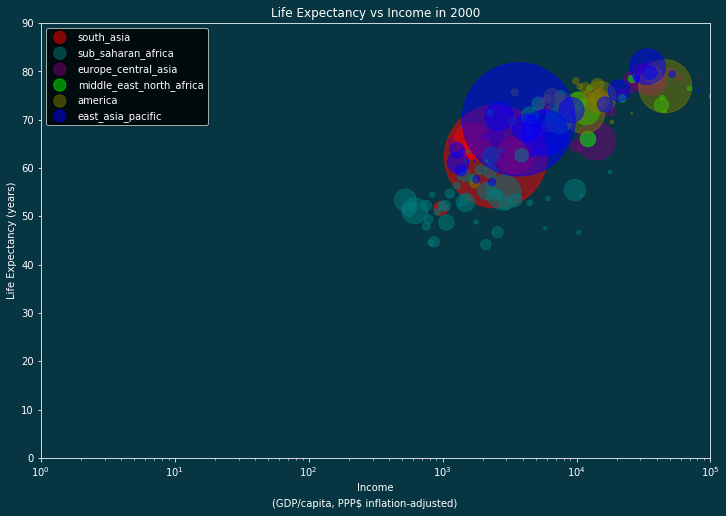

In [7]:

for region in millenium['world_6region'].unique():
	regional = millenium[millenium['world_6region'] == region]
	pyplot.scatter(regional['gdp_per_capita'], regional['life_expectancy_years'], s=regional['scatter_size'], color=regional['map_c'], alpha=0.5, label=region)
# pyplot.scatter(millenium['gdp_per_capita'], millenium['life_expectancy_years'], s=millenium['scatter_size'], c=millenium['map_c'], cmap='Paired', alpha=0.5)
figure = pyplot.gcf()
figure.patch.set(facecolor='#073642')
axes = figure.axes
axes[0].patch.set(facecolor='#073642')
figure.set_size_inches(12,8)

pyplot.ylim(0,90)
pyplot.xscale('log')
pyplot.xlim(1,100000)

subtitle_font = {'horizontalalignment': 'center'}

xlabel = pyplot.xlabel('Income')
p = xlabel.get_position()
xlabel_sub = figure.text(p[0],p[1]+0.04,'(GDP/capita, PPP$ inflation-adjusted)', fontdict=subtitle_font)

ylabel = pyplot.ylabel('Life Expectancy (years)')

legend = pyplot.legend()

# Hacky way of fixing legend dot sizes
# Courtesy of https://stackoverflow.com/a/24707567
for handle in legend.legendHandles:
	handle._sizes = [150]

pyplot.title('Life Expectancy vs Income in 2000')

pyplot.show()


In [8]:
regional_means = merged.groupby(['world_6region','time']).mean()
global_means = merged.groupby(['time']).mean()
regional_devs = merged.groupby(['world_6region','time']).std()
global_devs = merged.groupby(['time']).std()
#regional_means.head()

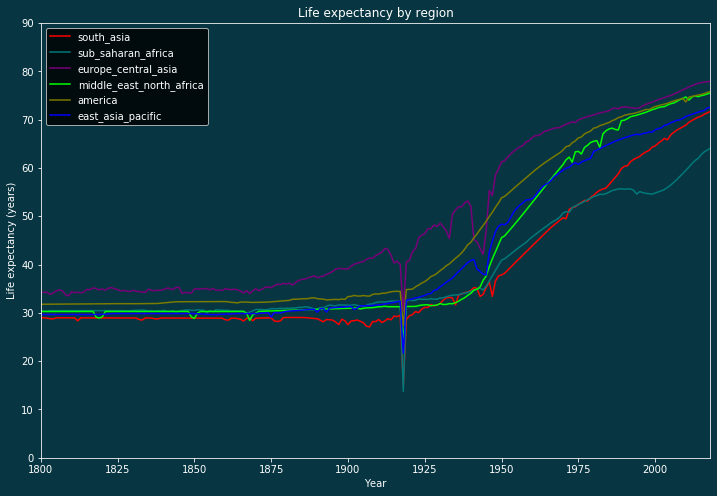

In [9]:
for region in millenium['world_6region'].unique():
	regional_sum = regional_means.loc[region]
	color = millenium.loc[millenium['world_6region']==region, 'map_c'].iloc[0]
	pyplot.plot(regional_sum.index,regional_sum['life_expectancy_years'], label=region, color=color)

figure = pyplot.gcf()
figure.patch.set(facecolor='#073642')
axes = figure.axes
axes[0].patch.set(facecolor='#073642')
figure.set_size_inches(12,8)

pyplot.ylim(0,90)
pyplot.xlim(1800,2018)

pyplot.legend()

pyplot.title('Life expectancy by region')
pyplot.xlabel('Year')
pyplot.ylabel('Life expectancy (years)')

pyplot.show()


In [10]:
#regional_devs.head()


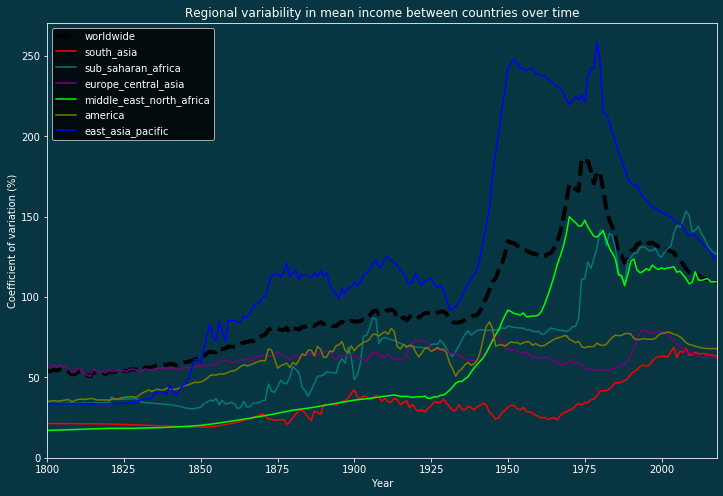

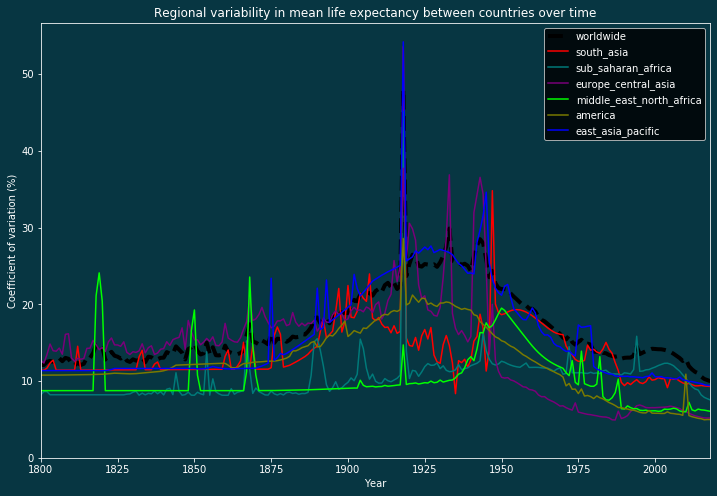

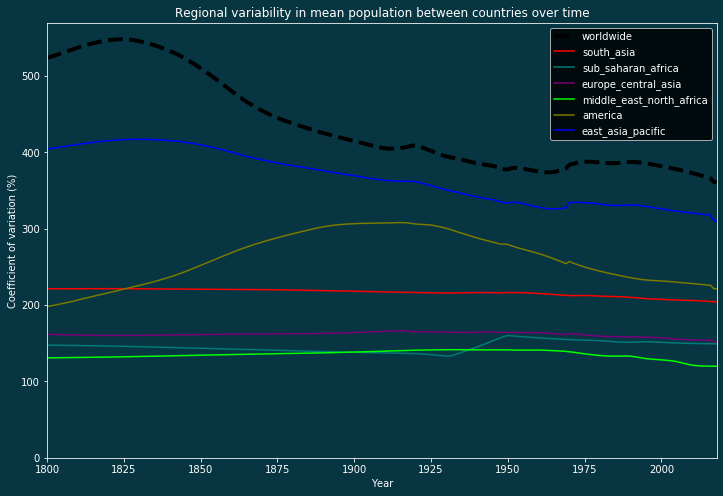

In [11]:
columns = {'gdp_per_capita': 'income',
			'life_expectancy_years': 'life expectancy',
			'population_total': 'population'}
for column in columns:
	pyplot.plot(global_devs.index,global_devs[column]/global_means[column]*100, label='worldwide', color='black', lw=4, ls='dashed')
	for region in millenium['world_6region'].unique():
		regional_dev = regional_devs.loc[region]
		regional_mean = regional_means.loc[region]
		color = millenium.loc[millenium['world_6region']==region, 'map_c'].iloc[0]
		pyplot.plot(regional_dev.index,regional_dev[column]/regional_mean[column]*100, label=region, color=color)

	figure = pyplot.gcf()
	figure.patch.set(facecolor='#073642')
	axes = figure.axes
	axes[0].patch.set(facecolor='#073642')
	figure.set_size_inches(12,8)

	# pyplot.ylim(0,90)
	pyplot.xlim(1800,2018)
	pyplot.ylim(bottom=0)

	pyplot.legend()
	pyplot.title('Regional variability in mean '+columns[column]+' between countries over time')

	pyplot.ylabel('Coefficient of variation (%)')
	pyplot.xlabel('Year')

	pyplot.show()


 # STRETCH OPTIONS

 ## 1. Animate!

 - [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
 - Try using [Plotly](https://plot.ly/python/animations/)!
 - [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
 - [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

 ## 2. Study for the Sprint Challenge

 - Concatenate DataFrames
 - Merge DataFrames
 - Reshape data with `pivot_table()` and `.melt()`
 - Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

 ## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [12]:
# TODO


